In [577]:

import warnings
warnings.filterwarnings('ignore')


In [578]:
import numpy as np
import pandas as pd

In [579]:
#Read the file
bikeData = pd.read_csv("day.csv")
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [580]:
#check the shape
bikeData.shape


(730, 16)

In [581]:
bikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [582]:
#check the data type
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Data Cleaning

In [583]:
#Check for null values or NA values
null_columns = bikeData.columns[bikeData.isnull().any()]

# Print columns with null or NA values
if null_columns.empty:
    print("No columns have null or NA values.")
else:
    print("Columns with null or NA values:", null_columns)
    
 #AS no column contain null or NA value,so nothing to do in this   

No columns have null or NA values.


In [584]:
#check unique values for categorical variables.Below data shows there categorical values are fine.
#No junk value.It is align with data calatlogue

columns_to_check = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for column in columns_to_check:
    unique_values = bikeData[column].unique()
    print(f'Unique values for {column}: {unique_values}')

Unique values for season: [1 2 3 4]
Unique values for yr: [0 1]
Unique values for mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values for holiday: [0 1]
Unique values for weekday: [6 0 1 2 3 4 5]
Unique values for workingday: [0 1]
Unique values for weathersit: [2 1 3]


In [585]:
#There are some reduncant columns and some columns which is of no use.
#instant-Index of record(no use),dteday-no use as we have seprate field for year and month
bikeData = bikeData.drop(['instant', 'dteday'], axis=1)
bikeData.shape

(730, 14)

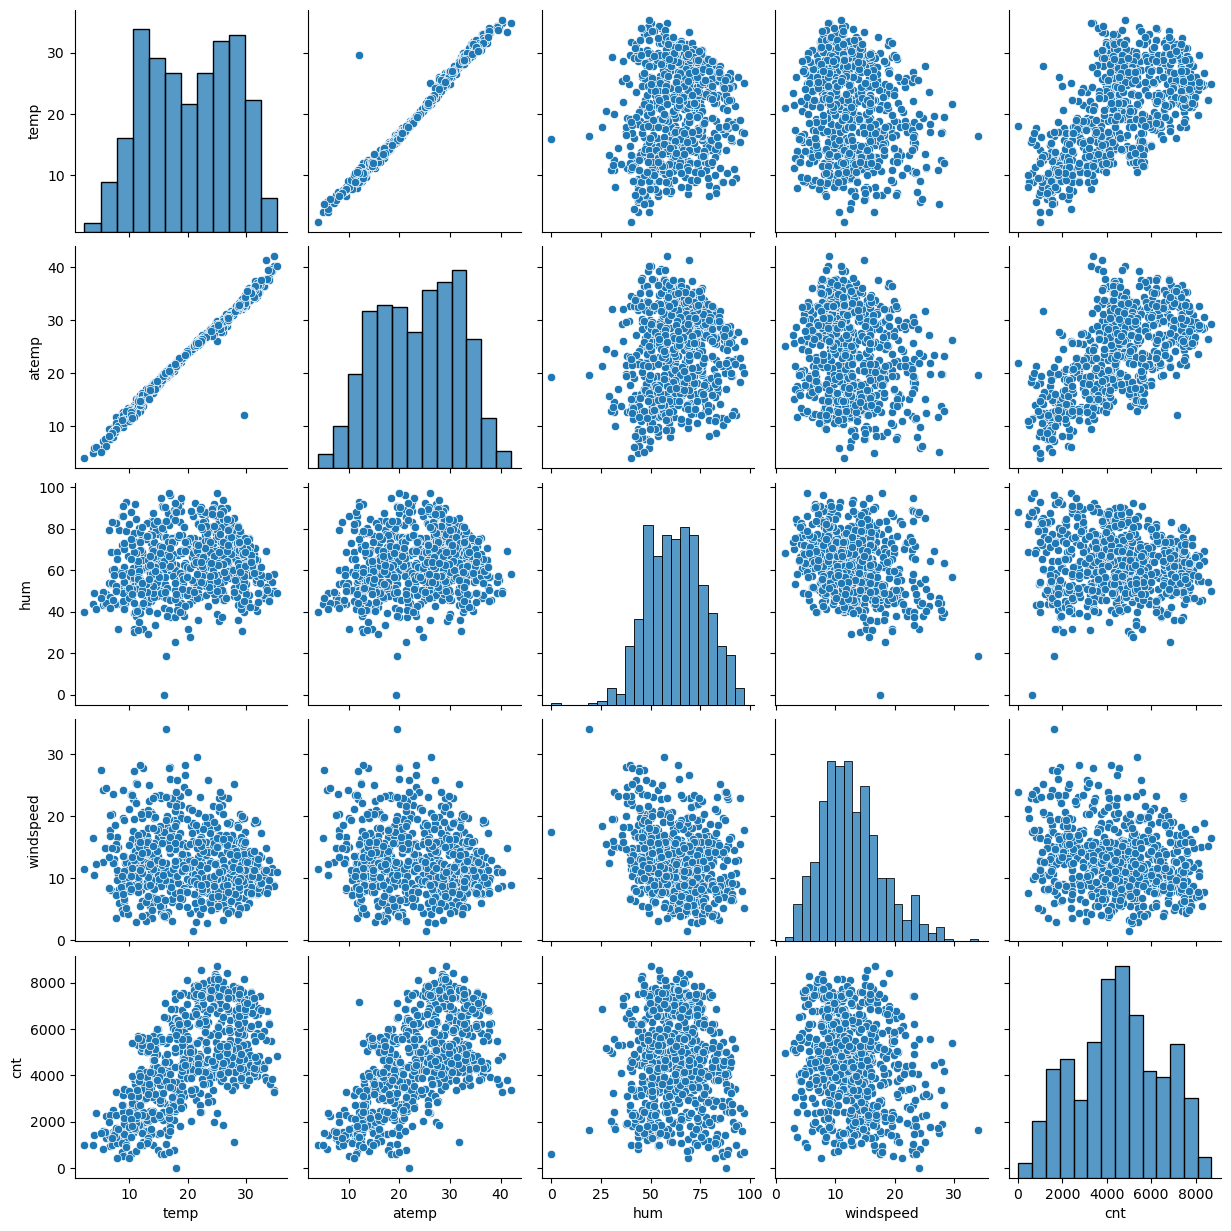

In [586]:
#Visualise The Data
#Visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
#plot numerical data to see if they follow linear regression
sns.pairplot(bikeData[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']])
plt.show()

#We can identify some linear regreesion pattern between temp,atemp,cnt

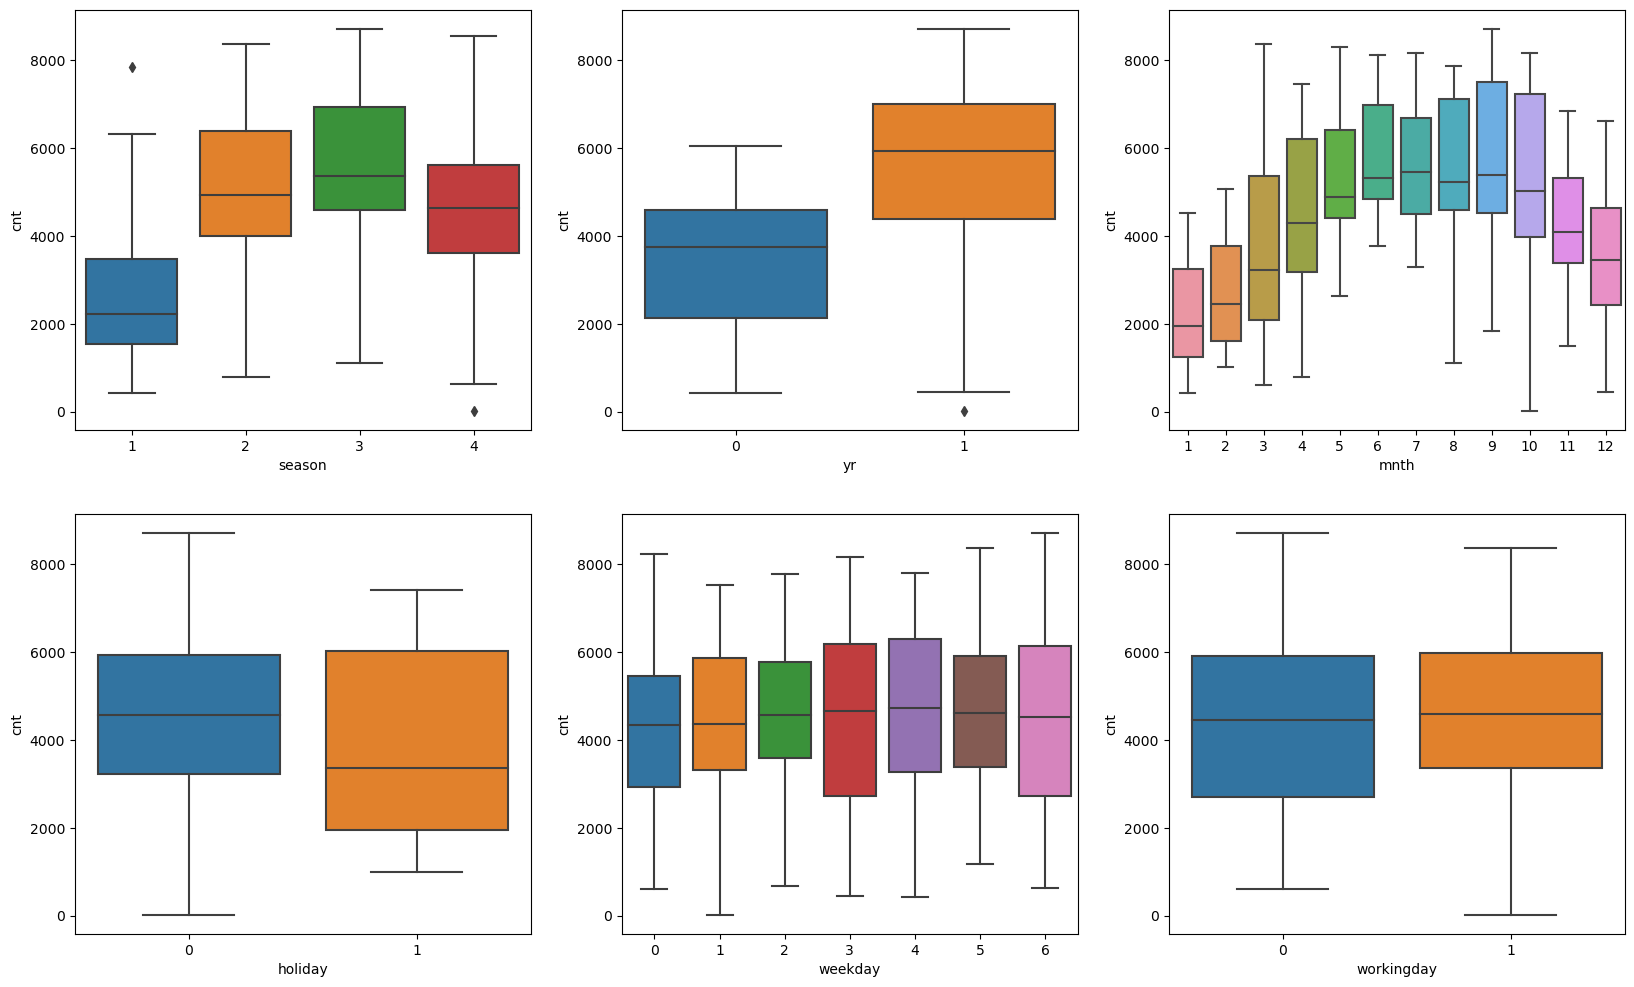

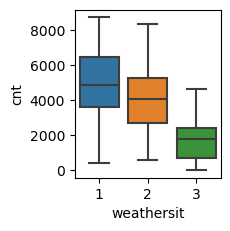

In [587]:
#Visualising Categorical Variables
#Let's make a boxplot for some of these variables.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeData)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeData)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeData)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeData)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeData)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeData)
plt.show()
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeData)
plt.show()

#observations
#1)Season->season can be a good indicator as most of bookings we done in season3 followed by season2,season4,season1
#2)year and month-These are two good prdeictors as most of bookings were done in slected timeframe
#3)Not much of bookings were doneduring holiday.Data shows booking count almost same as of working day and non working day
#4)weathersit-Most of bookings were done in weather sit 1,followed by 2 and 3.It is a good predictor

#### Data Prepration


In [588]:
#Data Prepration
#Dummy Variables


columns_to_convert = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
bikeData_temp = bikeData[columns_to_convert]

# Convert specified columns to categorical variables
bikeData_temp[columns_to_convert] = bikeData_temp[columns_to_convert].astype('category')

# Create Dummy Variables
dummies = pd.get_dummies(bikeData_temp, drop_first=True)

# Drop original categorical columns from the original DataFrame
bikeData = bikeData.drop(columns=columns_to_convert)

# Concatenate the dummy variables to the original DataFrame
bikeDataFinal = pd.concat([bikeData, dummies], axis=1)
#No need for col dteday as we have month and year sperately

bikeDataFinal.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

In [589]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bikeDataFinal, train_size = 0.7, test_size = 0.3, random_state = 100)

In [590]:
df_test.head

<bound method NDFrame.head of           temp     atemp      hum  windspeed  casual  registered   cnt  \
184  29.793347  33.27085  63.7917   5.459106    3065        2978  6043   
535  32.082500  36.04875  59.2083   7.625404     872        5339  6211   
299  19.270000  22.85230  81.2917  13.250121     240        2419  2659   
221  31.433347  34.24915  42.4167  13.417286     884        3896  4780   
152  29.315000  32.19710  30.5000  19.583229     736        4232  4968   
..         ...       ...      ...        ...     ...         ...   ...   
400  10.899153  13.22605  68.7917  11.791732     318        2629  2947   
702  19.509153  23.45270  73.3750  11.666643     551        6055  6606   
127  21.661653  25.94665  63.1667   5.000712    1401        2932  4333   
640  26.957500  29.95665  79.3750   4.458569     728        6844  7572   
72   13.333897  16.60000  49.6957   9.174042     359        1687  2046   

     season_2  season_3  season_4  ...  holiday_1  weekday_1  weekday_2  \
184   

### Rescaling the Features 


In [591]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Apply rescaling to all non dummy variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
653,0.509887,0.501133,0.575354,0.300794,922,6612,0.864243,0,0,1,...,0,0,1,0,0,0,0,1,0,0
576,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658,0,1,0,...,0,0,1,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [592]:
df_train.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,0.513620,0.245098,0.262745,0.24902,...,0.025490,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.676471,0.343137,0.029412
std,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,0.224593,0.430568,0.440557,0.43287,...,0.157763,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.468282,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


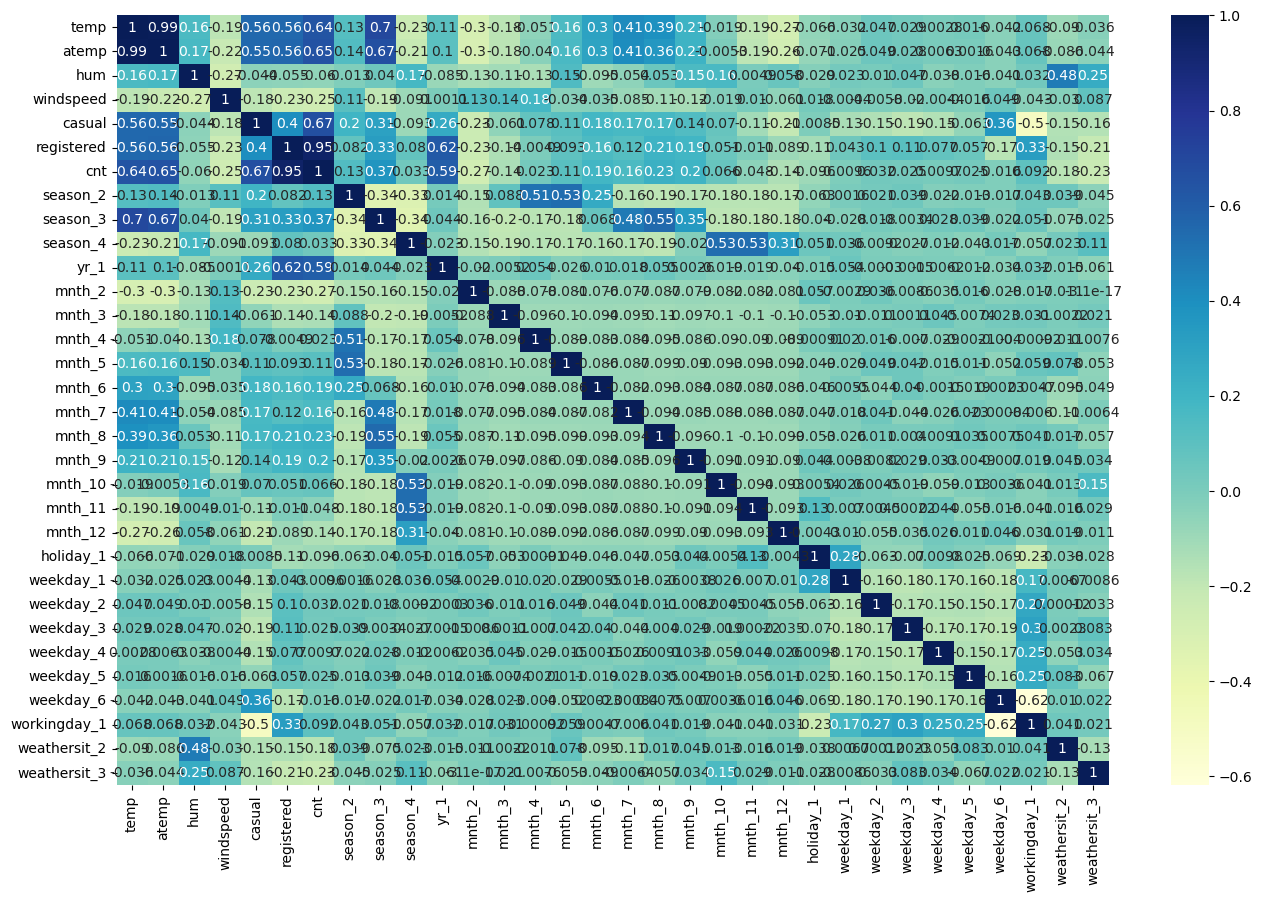

In [593]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#Strong correlation between
#1)temp-atemp
#2)registered-cnt
#variables are multicollinear

In [594]:
#lets use RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y_train = df_train.pop('cnt')
X_train = df_train

# Let the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr, n_features_to_select=20)     
rfe = rfe.fit(X_train, y_train)

y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [595]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_2', False, 11),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', False, 3),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 12),
 ('mnth_11', True, 1),
 ('mnth_12', False, 5),
 ('holiday_1', True, 1),
 ('weekday_1', False, 6),
 ('weekday_2', False, 10),
 ('weekday_3', False, 7),
 ('weekday_4', False, 4),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('workingday_1', False, 9),
 ('weathersit_2', False, 8),
 ('weathersit_3', True, 1)]

In [596]:

#listing important columns by RFE
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_11', 'holiday_1', 'weekday_5', 'weekday_6',
       'weathersit_3'],
      dtype='object')

In [597]:
X_train.columns[~rfe.support_]
#listing not important columns by RFE

Index(['season_2', 'yr_1', 'mnth_2', 'mnth_10', 'mnth_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'workingday_1', 'weathersit_2'],
      dtype='object')

In [598]:
###Building model using statsmodel, for the detailed statistics

X_train_rfe = X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.510e+30
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:27:49   Log-Likelihood:                 17158.
No. Observations:                 510   AIC:                        -3.427e+04
Df Residuals:                     489   BIC:                        -3.419e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0025    1.9e-16  -1.33e+13   

In [599]:
#lets check the vif of variables

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,67.08
2,atemp,55.90
0,const,50.19
7,season_3,7.22
14,mnth_8,5.58
13,mnth_7,5.07
15,mnth_9,3.27
12,mnth_6,3.20
8,season_4,3.08
11,mnth_5,2.63


In [600]:
#  co-relation of atemp and temp which is 0.99,it is reduncacnt
print(X.columns)

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'season_2',
       'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')


In [601]:
#lets drop atemp from our model
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [602]:
X_train_cons_2 = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_cons_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.610e+30
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:27:52   Log-Likelihood:                 17306.
No. Observations:                 510   AIC:                        -3.457e+04
Df Residuals:                     490   BIC:                        -3.449e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0025   1.42e-16  -1.79e+13   

In [603]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_11', 'holiday_1', 'weekday_5', 'weekday_6',
       'weathersit_3'],
      dtype='object')

In [604]:
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,47.08
1,hum,12.57
4,registered,11.04
5,season_3,9.76
12,mnth_8,6.00
3,casual,5.61
11,mnth_7,5.45
2,windspeed,4.18
6,season_4,4.07
13,mnth_9,3.48


In [605]:
#let us drop registered from our model
X_train_new_3 = X_train_new.drop(["registered"], axis = 1)
X_train_cm_3 = sm.add_constant(X_train_new_3)

lr_3 = sm.OLS(y_train, X_train_cm_3).fit()
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     58.24
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          2.64e-109
Time:                        22:27:53   Log-Likelihood:                 329.88
No. Observations:                 510   AIC:                            -621.8
Df Residuals:                     491   BIC:                            -541.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3479      0.037      9.339   

In [606]:

vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,41.59
1,hum,12.47
4,season_3,9.76
11,mnth_8,6.00
3,casual,5.49
10,mnth_7,5.43
2,windspeed,4.15
5,season_4,3.85
12,mnth_9,3.47
9,mnth_6,3.41


In [607]:
#let us drop humidity from model as it will be covered under temp and it has high vif

X_train_new_4 = X_train_new_3.drop(["hum"], axis = 1)
X_train_cm_4 = sm.add_constant(X_train_new_4)

lr_4 = sm.OLS(y_train, X_train_cm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     56.16
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.86e-103
Time:                        22:27:55   Log-Likelihood:                 313.53
No. Observations:                 510   AIC:                            -591.1
Df Residuals:                     492   BIC:                            -514.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1876      0.025      7.441   

In [608]:

vif = pd.DataFrame()
vif['Features'] = X_train_new_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_4.values, i) for i in range(X_train_new_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.21
3,season_3,9.69
10,mnth_8,5.79
2,casual,5.28
9,mnth_7,5.08
1,windspeed,3.95
4,season_4,3.81
11,mnth_9,3.44
8,mnth_6,3.12
7,mnth_5,2.77


In [609]:
#let us remove mnth_5 as it has high p value
X_train_new_5 = X_train_new_4.drop(["mnth_5"], axis = 1)
X_train_cm_5 = sm.add_constant(X_train_new_5)

lr_5 = sm.OLS(y_train, X_train_cm_5).fit()
print(lr_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     59.51
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          4.92e-104
Time:                        22:27:56   Log-Likelihood:                 312.76
No. Observations:                 510   AIC:                            -591.5
Df Residuals:                     493   BIC:                            -519.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1823      0.025      7.337   

In [610]:

vif = pd.DataFrame()
vif['Features'] = X_train_new_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_5.values, i) for i in range(X_train_new_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,13.79
3,season_3,9.17
2,casual,5.25
9,mnth_8,4.82
8,mnth_7,4.14
1,windspeed,3.85
10,mnth_9,3.01
4,season_4,2.48
7,mnth_6,1.99
11,mnth_11,1.61


In [611]:
#let us remove mnth_6 as it has high p value
X_train_new_6 = X_train_new_5.drop(["mnth_6"], axis = 1)
X_train_cm_6 = sm.add_constant(X_train_new_6)

lr_6 = sm.OLS(y_train, X_train_cm_6).fit()
print(lr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     63.58
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.50e-105
Time:                        22:27:57   Log-Likelihood:                 312.69
No. Observations:                 510   AIC:                            -593.4
Df Residuals:                     494   BIC:                            -525.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1805      0.024      7.411   

In [612]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_6.values, i) for i in range(X_train_new_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,11.36
3,season_3,8.32
2,casual,5.25
1,windspeed,3.79
8,mnth_8,3.43
7,mnth_7,2.95
4,season_4,2.33
9,mnth_9,2.32
10,mnth_11,1.61
13,weekday_6,1.57


In [613]:
#let us remove mnth_8 as it has high p value
X_train_new_7 = X_train_new_6.drop(["mnth_8"], axis = 1)
X_train_cm_7 = sm.add_constant(X_train_new_7)

lr_7 = sm.OLS(y_train, X_train_cm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     68.23
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          8.32e-106
Time:                        22:27:57   Log-Likelihood:                 312.61
No. Observations:                 510   AIC:                            -595.2
Df Residuals:                     495   BIC:                            -531.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1800      0.024      7.407   

In [614]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_7.values, i) for i in range(X_train_new_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,11.32
2,casual,5.25
3,season_3,4.00
1,windspeed,3.77
4,season_4,2.31
9,mnth_11,1.60
7,mnth_7,1.57
12,weekday_6,1.57
8,mnth_9,1.42
6,mnth_4,1.32


In [615]:
#let us remove weekday_5 as it has high p value
X_train_new_8 = X_train_new_7.drop(["weekday_5"], axis = 1)
X_train_cm_8 = sm.add_constant(X_train_new_8)

lr_8 = sm.OLS(y_train, X_train_cm_8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     73.53
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.17e-106
Time:                        22:27:58   Log-Likelihood:                 312.39
No. Observations:                 510   AIC:                            -596.8
Df Residuals:                     496   BIC:                            -537.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1822      0.024      7.571   

In [616]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_8.values, i) for i in range(X_train_new_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,11.22
2,casual,5.24
3,season_3,4.00
1,windspeed,3.75
4,season_4,2.30
9,mnth_11,1.60
7,mnth_7,1.57
11,weekday_6,1.55
8,mnth_9,1.42
6,mnth_4,1.32


In [617]:
#let us remove mnth_4 as it has high p value
X_train_new_9 = X_train_new_8.drop(["mnth_4"], axis = 1)
X_train_cm_9 = sm.add_constant(X_train_new_9)

lr_9 = sm.OLS(y_train, X_train_cm_9).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     79.12
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          5.25e-107
Time:                        22:27:59   Log-Likelihood:                 310.93
No. Observations:                 510   AIC:                            -595.9
Df Residuals:                     497   BIC:                            -540.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1848      0.024      7.685   

In [618]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_9.values, i) for i in range(X_train_new_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,11.19
2,casual,5.10
3,season_3,3.77
1,windspeed,3.54
4,season_4,2.17
8,mnth_11,1.60
6,mnth_7,1.57
10,weekday_6,1.54
7,mnth_9,1.42
5,mnth_3,1.22


In [619]:
#casual data is being captured by other variables like days and month.We can drop this
X_train_new_10 = X_train_new_9.drop(["casual"], axis = 1)
X_train_cm_10 = sm.add_constant(X_train_new_10)

lr_10 = sm.OLS(y_train, X_train_cm_10).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     51.17
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.17e-74
Time:                        22:28:00   Log-Likelihood:                 231.37
No. Observations:                 510   AIC:                            -438.7
Df Residuals:                     498   BIC:                            -387.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1533      0.028      5.486   

In [620]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_10.values, i) for i in range(X_train_new_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.17
2,season_3,3.71
1,windspeed,3.36
3,season_4,2.17
7,mnth_11,1.60
5,mnth_7,1.57
6,mnth_9,1.41
4,mnth_3,1.22
9,weekday_6,1.18
10,weathersit_3,1.06


In [621]:
#mnth_11   has high P value.Which means it is redundant
X_train_new_11 = X_train_new_10.drop(["mnth_11"], axis = 1)
X_train_cm_11 = sm.add_constant(X_train_new_11)

lr_11 = sm.OLS(y_train, X_train_cm_11).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     56.40
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.52e-75
Time:                        22:28:00   Log-Likelihood:                 231.36
No. Observations:                 510   AIC:                            -440.7
Df Residuals:                     499   BIC:                            -394.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1533      0.028      5.494   

In [622]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_11.values, i) for i in range(X_train_new_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.09
2,season_3,3.67
1,windspeed,3.32
5,mnth_7,1.57
3,season_4,1.54
6,mnth_9,1.39
4,mnth_3,1.22
8,weekday_6,1.18
9,weathersit_3,1.06
7,holiday_1,1.04


In [623]:
#Weekday 6 has high p value
X_train_new_12 = X_train_new_10.drop(["weekday_6"], axis = 1)
X_train_cm_12 = sm.add_constant(X_train_new_12)

lr_12 = sm.OLS(y_train, X_train_cm_12).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     56.36
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.70e-75
Time:                        22:28:01   Log-Likelihood:                 231.25
No. Observations:                 510   AIC:                            -440.5
Df Residuals:                     499   BIC:                            -393.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1548      0.028      5.577   

In [624]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_12.values, i) for i in range(X_train_new_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.15
2,season_3,3.71
1,windspeed,3.29
3,season_4,2.16
7,mnth_11,1.60
5,mnth_7,1.57
6,mnth_9,1.41
4,mnth_3,1.22
9,weathersit_3,1.06
8,holiday_1,1.05


In [625]:
#mnth_11  has high p value
X_train_new_13 = X_train_new_12.drop(["mnth_11"], axis = 1)
X_train_cm_13 = sm.add_constant(X_train_new_13)

lr_13 = sm.OLS(y_train, X_train_cm_13).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     62.74
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.08e-76
Time:                        22:28:01   Log-Likelihood:                 231.25
No. Observations:                 510   AIC:                            -442.5
Df Residuals:                     500   BIC:                            -400.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1547      0.028      5.584   

In [626]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_13.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_13.values, i) for i in range(X_train_new_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.06
2,season_3,3.67
1,windspeed,3.26
5,mnth_7,1.57
3,season_4,1.53
6,mnth_9,1.39
4,mnth_3,1.22
8,weathersit_3,1.06
7,holiday_1,1.04


In [627]:
#mnth_3  has high p value
X_train_new_14 = X_train_new_13.drop(["mnth_3"], axis = 1)
X_train_cm_14 = sm.add_constant(X_train_new_14)

lr_14 = sm.OLS(y_train, X_train_cm_14).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     70.53
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.45e-77
Time:                        22:28:03   Log-Likelihood:                 230.87
No. Observations:                 510   AIC:                            -443.7
Df Residuals:                     501   BIC:                            -405.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1592      0.027      5.854   

In [628]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_14.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_14.values, i) for i in range(X_train_new_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.97
2,season_3,3.54
1,windspeed,3.11
4,mnth_7,1.57
3,season_4,1.46
5,mnth_9,1.39
7,weathersit_3,1.06
6,holiday_1,1.03


In [629]:
#mnth_7  has high p value
X_train_new_15 = X_train_new_14.drop(["mnth_7"], axis = 1)
X_train_cm_15 = sm.add_constant(X_train_new_15)

lr_15 = sm.OLS(y_train, X_train_cm_15).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     79.47
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.10e-77
Time:                        22:28:04   Log-Likelihood:                 228.69
No. Observations:                 510   AIC:                            -441.4
Df Residuals:                     502   BIC:                            -407.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1638      0.027      6.023   

In [630]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_15.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_15.values, i) for i in range(X_train_new_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.93
1,windspeed,3.10
2,season_3,3.00
3,season_4,1.46
4,mnth_9,1.26
6,weathersit_3,1.06
5,holiday_1,1.03


### Residual Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

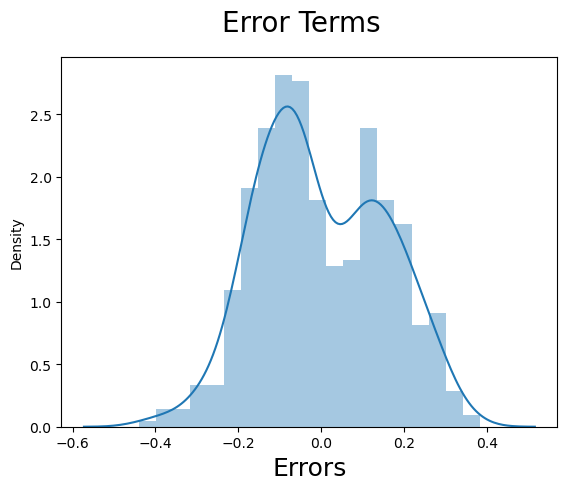

In [631]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = lr_15.predict(X_train_cm_15)
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show

#We can see error terms are almost normally distributed

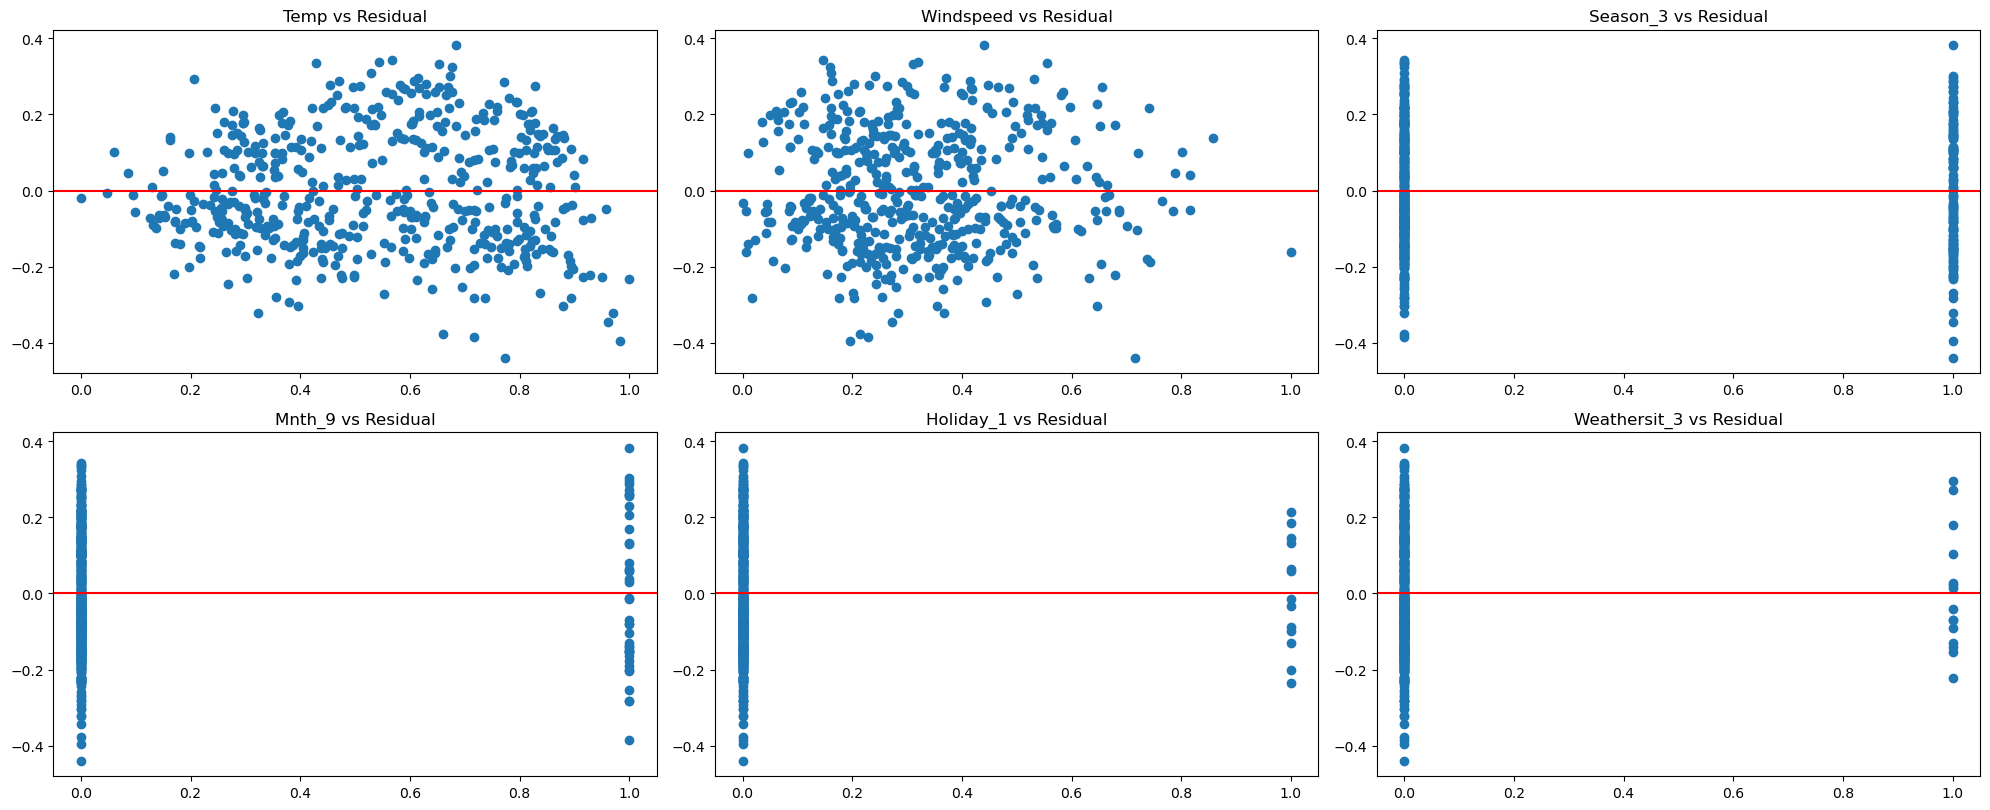

In [632]:
columns_to_plot = ['temp', 'windspeed', 'season_3', 'mnth_9', 'holiday_1', 'weathersit_3']

plt.figure(figsize=(20, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    plt.scatter(X_train_new_15[column], res)
    plt.title(f"{column.capitalize()} vs Residual")
    plt.axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()

#From scatter plot we can see most of means are being centerd at zero.Thus they have constant variance

### Making Predictions Using the Final Model

In [633]:
#Apply scaling on test data
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,875.968037,3671.013699,0.520592,0.264840,0.246575,0.232877,...,0.036530,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.698630,0.319635,0.027397
std,0.233698,0.217888,0.148974,0.159947,712.783588,1509.322560,0.218435,0.442259,0.432005,0.423633,...,0.188034,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.459904,0.467403,0.163612
min,0.046591,0.025950,0.261915,-0.042808,9.000000,432.000000,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,336.500000,2507.500000,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,736.000000,3667.000000,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,1190.000000,4624.000000,0.672745,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,3410.000000,6844.000000,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [634]:
df_test.head

<bound method NDFrame.head of          temp     atemp       hum  windspeed  casual  registered       cnt  \
184  0.831783  0.769660  0.657364   0.084219    3065        2978  0.692706   
535  0.901354  0.842587  0.610133   0.153728     872        5339  0.712034   
299  0.511964  0.496145  0.837699   0.334206     240        2419  0.303382   
221  0.881625  0.795343  0.437098   0.339570     884        3896  0.547400   
152  0.817246  0.741471  0.314298   0.537414     736        4232  0.569029   
..        ...       ...       ...        ...     ...         ...       ...   
400  0.257562  0.243430  0.708888   0.287411     318        2629  0.336516   
702  0.519232  0.511907  0.756118   0.283397     551        6055  0.757478   
127  0.584649  0.577380  0.650923   0.069510    1401        2932  0.495973   
640  0.745598  0.682653  0.817947   0.052115     728        6844  0.868615   
72   0.331557  0.332005  0.512107   0.203418     359        1687  0.232858   

     season_2  season_3  season_4

#### Dividing into X_test and y_test

In [635]:

X_test = df_test
y_test = df_test.pop('cnt')


In [636]:
X_test_final = sm.add_constant(X_test)
X_test_final = X_test_final[['const', 'temp', 'windspeed', 'season_3', 'mnth_9', 'holiday_1', 'weathersit_3','season_4']]# Making predictions using the fourth model
y_pred_final = lr_15.predict(X_test_final)

In [637]:
#above code was giving error initally.I use below comand to debug it.
# Check the columns used during training
#print("Columns used during training:", lr_15.params.index.tolist())

# Check the columns in X_test_final
#print("Columns in X_test_final:", X_test_final.columns.tolist())

### Model Evaluation

Text(0, 0.5, 'y_pred')

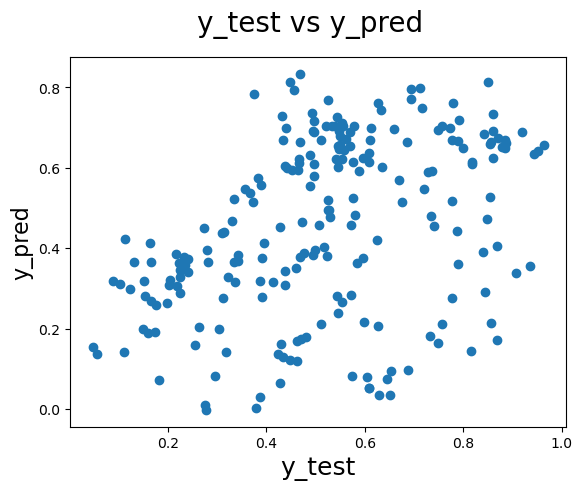

In [576]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label